In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
csv_path = "Data Cleaning/Resources/NFL Arrest CSV.csv"
df = pd.read_csv(csv_path)

df.head(954)

,DATE,TEAM,NAME,POS,CASE,CATEGORY,DESCRIPTION,OUTCOME
0,1/17/2020,NE,Joejuan Williams,CB,Arrested,Drugs,"Pulled over for speeding in Nashville, accused...",Resolution undetermined.
1,1/16/2020,CLE,Odell Beckham,WR,Warrant,Battery,Accused of slapping the buttocks of a police o...,Warrant rescinded.
2,1/11/2020,NE,Julian Edelman,WR,Arrested,Vandalism,Accused of jumping on the hood of a Mercedes i...,Resolution undetermined.
3,12/29/2019,MIA,Xavien Howard,CB,Arrested,Domestic violence,"Police in Davie, Fla., say he pushed his fianc...",Resolution undetermined.
4,12/20/2019,PIT,Kameron Kelly,S,Arrested,Disorderly conduct,Accused of making threats and resisting arrest...,Resolution undetermined. Team released him sam...
...,...,...,...,...,...,...,...,...
949,2/16/2000,KC,Andre Rison,WR,Arrested,Theft,"Accused of renting but not returning a $1,100 ...","Pleaded no contest, sentenced to one year of p..."
950,2/6/2000,NYJ,Wayne Chrebet,WR,Arrested,Disorderly conduct,Accused of disorderly conduct in altercation o...,"Pleaded guilty to nuisance violation, fined $230."
951,2/6/2000,IND,Keith Elias,RB,Arrested,Disorderly conduct,Accused of resisting arrest and disorderly con...,"Pleaded guilty to nuisance violation, fined $230."
952,2/5/2000,CIN,Steve Foley,LB,Arrested,Domestic violence,Accused of kicking in the door of his son's mo...,Charge dropped after woman declined to cooperate.


In [2]:
new = df.CATEGORY.str.split(",", expand=True)
df['NEW'] = new[0]
reduced = df.loc[:,['POS', 'NEW']]
reduced.head()
#counts = reduced['POS'].value_counts()
#counts_df = pd.DataFrame(counts)
#counts_df.index.names = ['pos']
#counts_df.rename(columns = {'POS':'freq'}, inplace = True) 
#counts_df




,POS,NEW
0,CB,Drugs
1,WR,Battery
2,WR,Vandalism
3,CB,Domestic violence
4,S,Disorderly conduct


In [3]:
reduced.NEW.unique()

array(['Drugs', 'Battery', 'Vandalism', 'Domestic violence',
       'Disorderly conduct', 'DUI', 'Assault', 'License',
       'Public intoxication', 'Reckless driving', 'Eluding police',
       'Trespassing', 'Insider trading', 'Domestic assault',
       'Bomb threat', 'Injury to elderly', 'Sexual assault', 'Robbery',
       'Selling alcohol to minor', 'Gun', 'Suspended license',
       'Resisting arrest', 'Probation violation', 'Police interference',
       'Violating court order', 'Traffic warrant', 'Hit-and-run',
       'Outstanding warrant', 'Sexual battery', 'Burglary',
       'Animal cruelty', 'Resisting officer', 'Evading arrest',
       'Indecent exposure', 'Handicap parking', 'Theft', 'Child abuse',
       'Speeding', 'Solicitation', 'Failure to Appear',
       'Resisting Arrest', 'Child support', 'Failure to appear', 'Weapon',
       'Murder', 'Attempted murder', 'Fraud', 'Criminal mischief',
       'False name', 'Obstruction', 'Traffic warrants',
       'Reckless endangermen

In [17]:
#we need to figure out crime categories here
#we didnt end up using this but had plands to make a simpler stacked bar graph with onl;y two crime type categories in the
#legend: violent and non-violewnt
violent = ['Battery', 'Domestic violence', 'Assault', 'Domestic assault', 'Bomb threat', 'Sexual assault', 
           'Injury to elderly',  'Robbery', 'Hit-and-run','Sexual abuse', 'Sexual battery', 'Burglary','Child abuse', 
           'Murder', 'Attempted murder','Manslaughter']
non_violent = ['Drugs', 'Vandalism','Disorderly conduct', 'DUI',  'License', 'Public intoxication', 
               'Reckless driving', 'Eluding police', 'Trespassing', 'Insider trading','Selling alcohol to minor', 
               'Gun', 'Suspended license', 'Resisting arrest', 'Probation violation', 'Police interference',
               'Violating court order', 'Traffic warrant', 'Outstanding warrant', 'Animal cruelty', 
               'Resisting officer', 'Evading arrest', 'Indecent exposure', 'Handicap parking', 'Theft', 'Speeding', 
               'Solicitation', 'Failure to Appear', 'Resisting Arrest', 'Child support', 'Failure to appear', 
               'Weapon', 'Fraud', 'Criminal mischief', 'False name', 'Obstruction', 'Traffic warrants',
               'Reckless endangerment', 'Sex', 'Stalking', 'Alcohol', 'Disturbing the peace', 'Public urination',
               'Outstanding Warrant', 'Domestic dispute', 'Guns', 'Interfering with police', 'Animal neglect', 
               'Dogfighting', 'Coercion', 'Pimping', 'Animal abuse', 'Evading police', 'Property destruction', 
               'Harassment', 'False information', 'Gambling', 'Breach of peace', 'Leaving scene.']

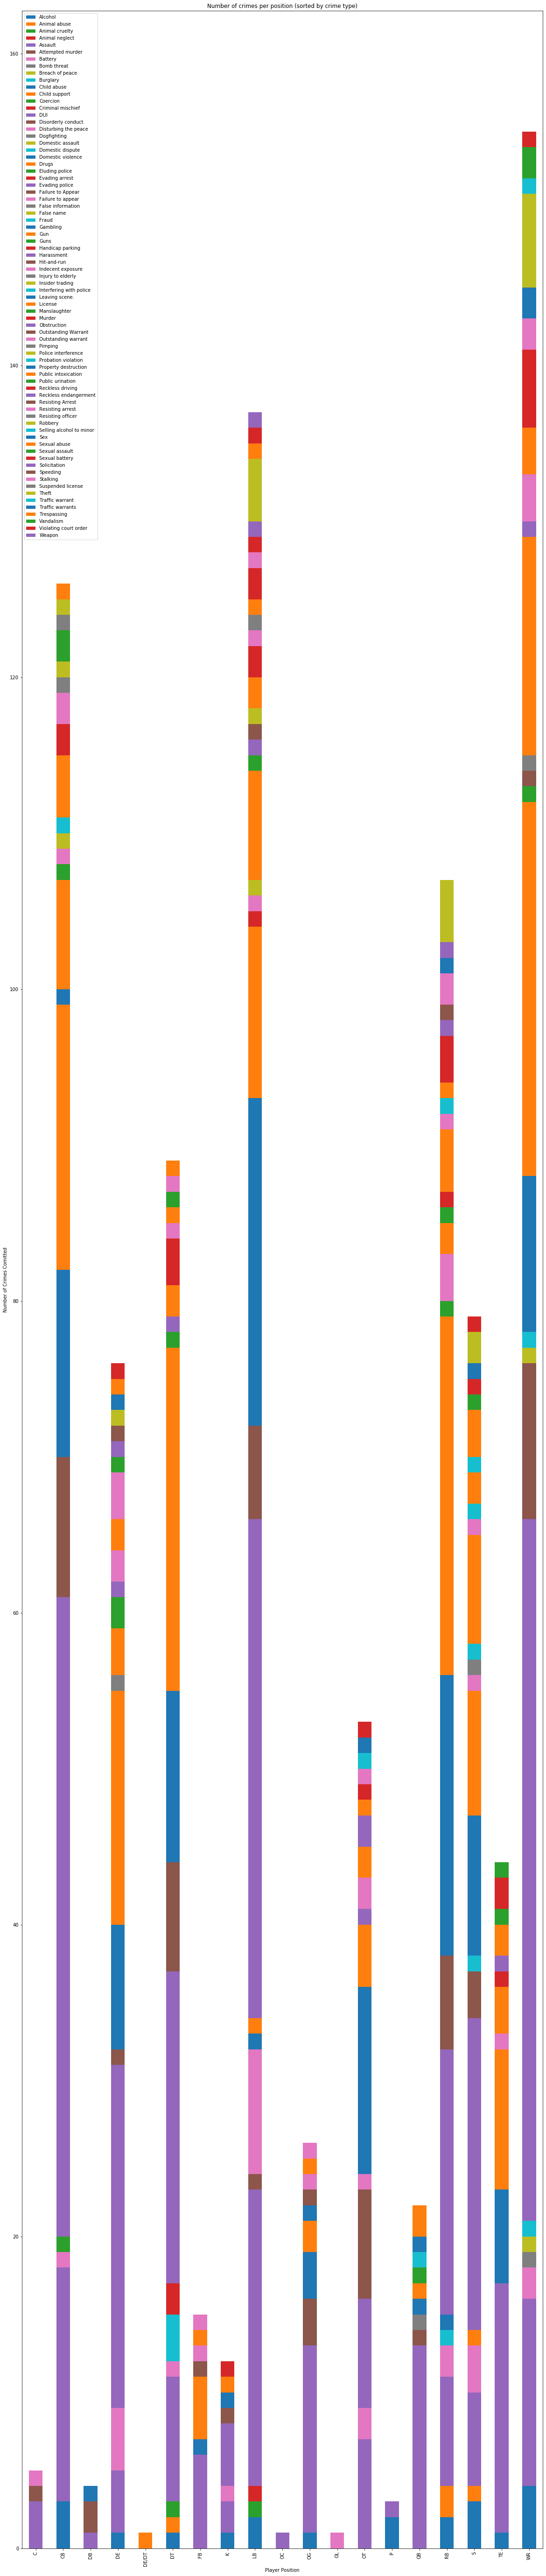

In [22]:
df2 = reduced.groupby(['POS', 'NEW'])['POS'].count().unstack('NEW').fillna(0)
#df2.columns

df2.plot(kind='bar', stacked=True, legend = False, figsize=(20, 100))
plt.ylabel("Number of Crimes Comitted")
plt.xlabel("Player Position")
plt.legend(loc="best")
plt.title("Number of crimes per position (sorted by crime type)")
plt.savefig("Number of crimes per position.png")

In [19]:
#make another that has crime type as tick marks on x axis and each bar counts nuber of crimes in that category

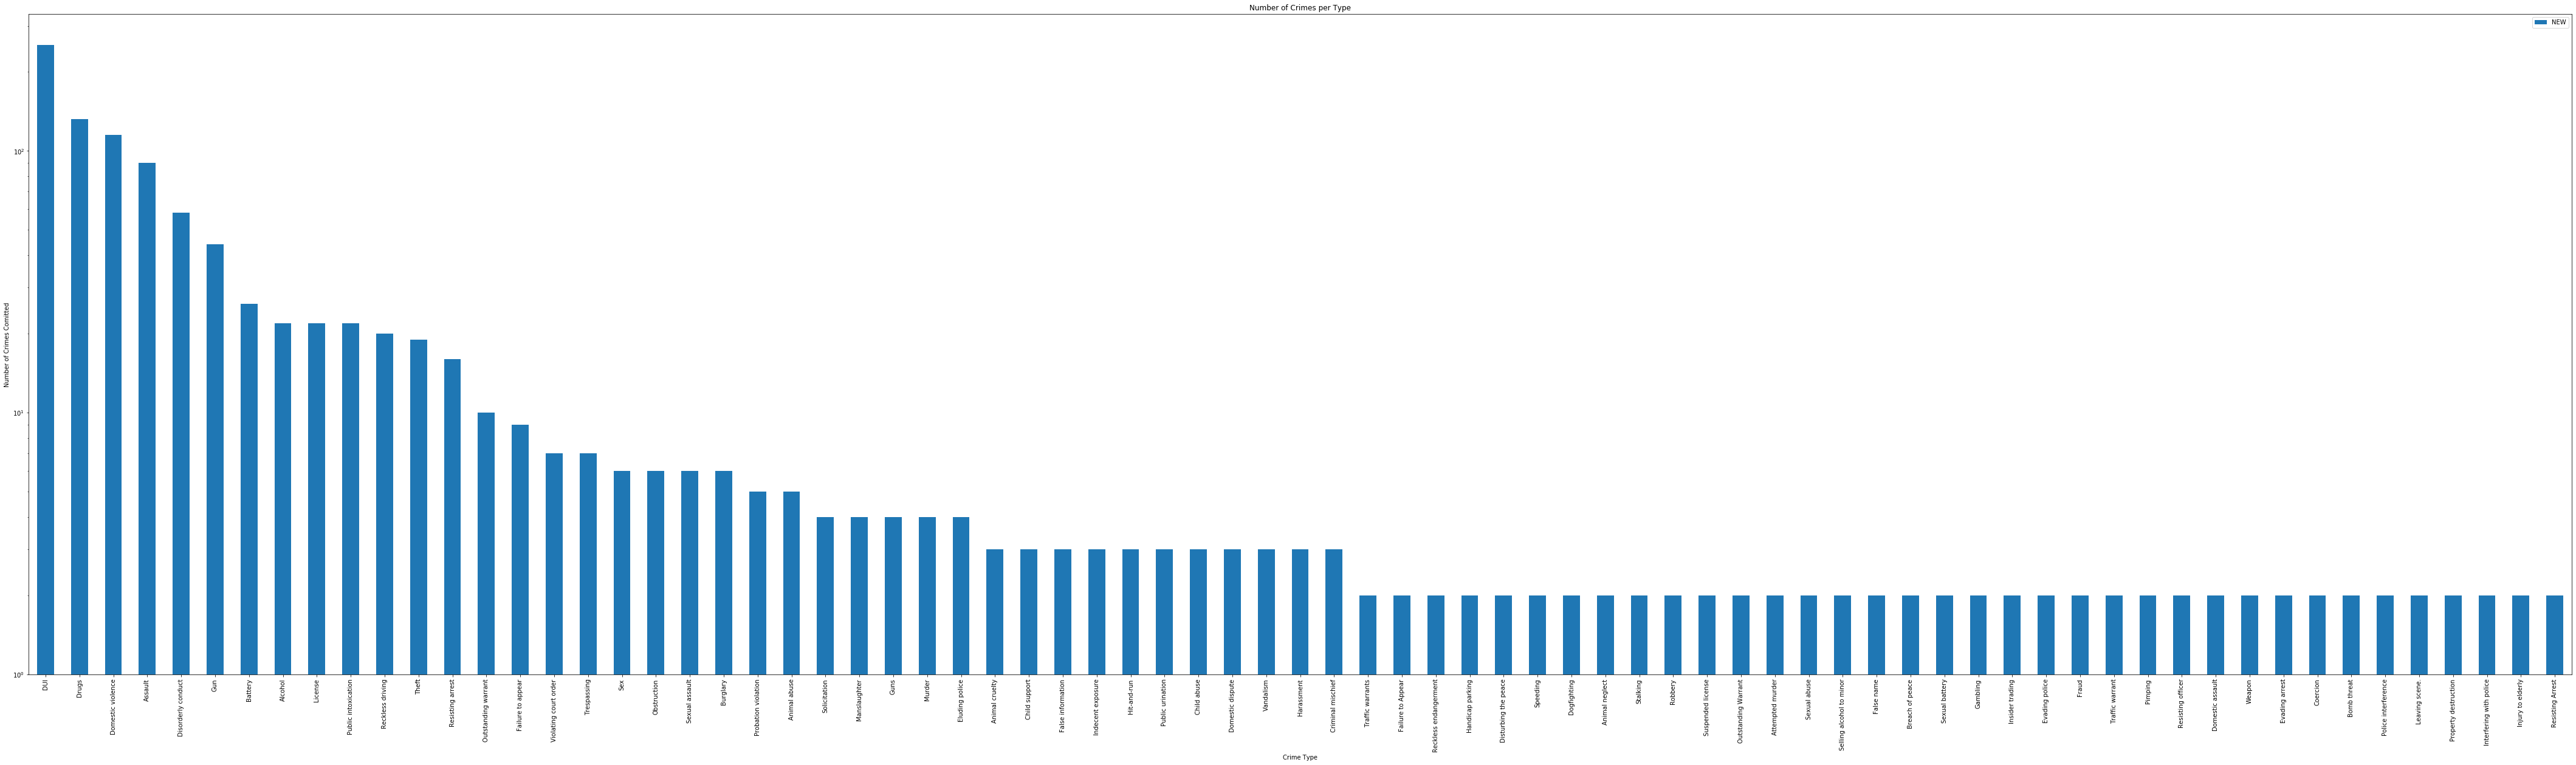

In [20]:
df3 = df['NEW'].value_counts()
#df3.plot(kind = 'bar')
df3.plot(kind='bar', figsize=(75, 20), log = True)
plt.ylabel("Number of Crimes Comitted")
plt.xlabel("Crime Type")
plt.legend(loc="best")
plt.title("Number of Crimes per Type")
plt.savefig("Number of Crimes per Type.png")